In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [29]:
def simulation(mean, cov, size=300):
    X1= multivariate_normal.rvs(mean=mean[0], cov=cov, size=100)
    X2= multivariate_normal.rvs(mean=mean[1], cov=cov, size=100)
    X3= multivariate_normal.rvs(mean=mean[2], cov=cov, size=100)
    arr = np.r_[X1,X2,X3]
    Y = np.concatenate([np.repeat(1,100), np.repeat(2,100), np.repeat(3,100)])
    df = np.column_stack([arr, Y])
    return arr,Y

from matplotlib import cm

def plotXY(X, Y):
    """
        Scatter points from two classes.
        Input:
            X and Y may be:
            - two numpy arrays with two columns; each array is the data matrix for a class (works only for
            two classes).
            - a numpy array with two columns (the data matrix) and the vector of labels (works for many classes).
    """    
    if Y.ndim > 1:
        X1 = X
        X2 = Y
        XX = np.concatenate((X, Y), axis=0)
        YY = np.concatenate((np.ones(X.shape[0]), -np.ones(Y.shape[0])))
    else:
        XX = X
        YY = Y
    for icl, cl in enumerate(np.unique(YY)):
        plt.scatter(XX[YY==cl, 0], XX[YY==cl, 1], label='Class {0:d}'.format(icl+1))
    plt.axis('equal')
    plt.legend()
    
def plot_frontiere(clf, data=None, num=500, label=None):
    """
        Plot the frontiere f(x)=0 of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: binary classifier with a method decision_function
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = np.fabs(clf.decision_function(np.c_[x.ravel(), y.ravel()])).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    ind = np.where((z-zmin)/(zmax-zmin) < 0.001)
    ind_sort = np.argsort(y[ind])
    plt.plot(x[ind][ind_sort], y[ind][ind_sort], label=label, linewidth=2)
    
def map_regions(clf, data=None, num=200):
    """
        Map the regions f(x)=1…K of the classifier clf within the same range as the one
        of the data.
        Input:
            clf: classifier with a method predict
            data: input data (X)
            num: discretization parameter
    """
    xmin, ymin = data.min(axis=0)
    xmax, ymax = data.max(axis=0)
    x, y = np.meshgrid(np.linspace(xmin, xmax, num), np.linspace(ymin, ymax))
    z = clf.predict(np.c_[x.ravel(), y.ravel()]).reshape(x.shape)
    zmin, zmax = z.min(), z.max()
    plt.imshow(z, origin='lower', interpolation="nearest",
               extent=[xmin, xmax, ymin, ymax], cmap=cm.coolwarm,
              alpha=0.3)

# KNN
## 1)

In [ ]:
arr, Y = simulation(mean = ([0,0], [5,5], [3,3]), cov=[1,1], size=600)
X_train, X_test, y_train, y_test = train_test_split(arr, Y, train_size=0.7)

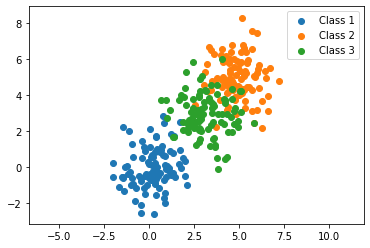

In [31]:
plotXY(arr,Y)

In [38]:
K = np.arange(1,150,1)
accuracy = []
for k in K:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    accuracy.append(knn_clf.score(X_test,y_test))

''

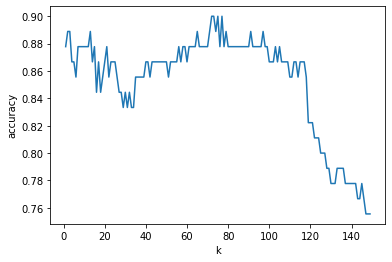

In [39]:
fig, ax = plt.subplots()
ax.plot(K, accuracy)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
;

In [48]:
#On choisit le meilleur clf
best_k = np.argmax(accuracy)
best_knn = KNeighborsClassifier(n_neighbors=71)

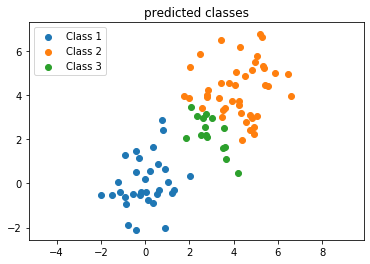

In [49]:
y_pred = knn_clf.predict(X_test)
fig ,ax = plt.subplots()
plotXY(X_test,y_pred)
ax.set_title('predicted classes');

## 2)

In [204]:
df = pd.read_csv('maladcoeur.txt', delim_whitespace=True)
df.drop('ind', axis=1, inplace=True)
df.head() #(462,9)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [205]:
y = df['chd']
X = df.drop('chd', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y)
K = np.arange(1,150,1)
accuracy = []
for k in K:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    accuracy.append(knn_clf.score(X_test,y_test))

''

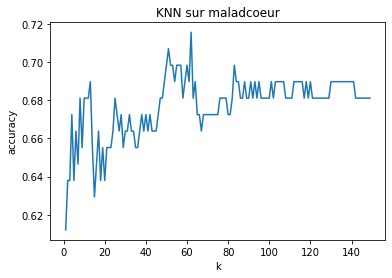

In [207]:
fig, ax = plt.subplots()
ax.plot(K, accuracy)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.set_title('KNN sur maladcoeur')
;

In [208]:
#Best k
np.argmax(accuracy)

61

In [ ]:
#Spam : même méthode

## 2) Kernel

In [77]:
arr, Y = simulation(mean = ([0,0], [5,5], [1,5]), cov=[1,1], size=300)

In [ ]:
class Kernel_clf(distance_h, nb_class):
    '''
    Our Kernel classifier
    '''
    def __init__(self):
        self.distance_h = distance_h
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    
    def decision_function(self, X,y):
        pass
    
    def predict(self, X):
        y_pred = []
        for i in np.arange(len(X)):
            tmp = self.X_train - X[i,:]
            tmp = tmp**2
            dist = np.sqrt(tmp.sum(axis=1))
            idx_neighbors = np.where(dist <= self.distance_h)
            y_neighbors = self.y_train[idx_neighbors]
            l = []
            for k in np.arange(self.nb_class):
                 l.append(sum(y_neighbors == k))
            y_pred.append(np.argmax(l))
        return y_pred

In [133]:
#Help 
tmp = X_train - X_new
tmp**2
tmp = tmp.sum(axis=1)
h =10
idx_neighbors = np.where(tmp < h)

l = [0,0,1]
sum(l == np.zeros(3))
sum(l == np.ones(3))
np.ones(3) + 1

array([[8, 0],
       [9, 8],
       [5, 2]])

## Arbres de classification 

In [151]:
#maladcoeur
#chargement des données
df = pd.read_csv('maladcoeur.txt', delim_whitespace=True)
df.drop('ind', axis=1, inplace=True)
df.head() #(462,9)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [152]:
#cv
y = df['chd']
X = df.drop('chd', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [163]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2)
tree_clf.fit(X_train, y_train);

[Text(334.8, 543.6, 'age <= 50.5\ngini = 0.432\nsamples = 346\nvalue = [237, 109]'),
 Text(167.4, 326.16, 'typea <= 68.5\ngini = 0.311\nsamples = 218\nvalue = [176, 42]'),
 Text(83.7, 108.72000000000003, 'gini = 0.281\nsamples = 207\nvalue = [172, 35]'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(502.20000000000005, 326.16, 'ldl <= 6.665\ngini = 0.499\nsamples = 128\nvalue = [61, 67]'),
 Text(418.5, 108.72000000000003, 'gini = 0.494\nsamples = 101\nvalue = [56, 45]'),
 Text(585.9, 108.72000000000003, 'gini = 0.302\nsamples = 27\nvalue = [5, 22]')]

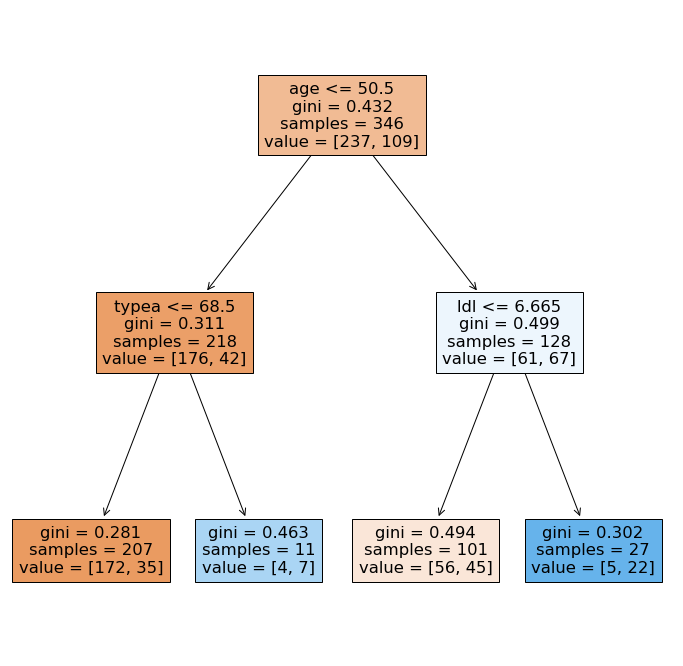

In [168]:
fig, ax = plt.subplots(figsize=(12,12))
plot_tree(tree_clf, feature_names = X.columns, filled=True)

**Prunning the tree :**
$$
R_{\alpha}(T) = R(T) + \alpha * |T|
$$
where 
- $ R(T) $ is traditionally defined as the total misclassification rate of the terminal nodes
- $ |T| $ is the number of terminal nodes in T

-> link : https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

In [169]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [170]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05100523312282501


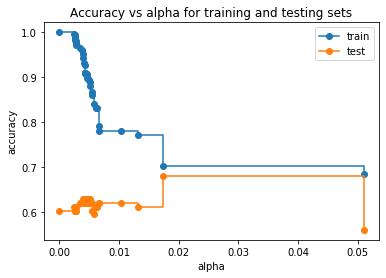

In [172]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend();

In [179]:
prunned_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
prunned_clf.fit(X_train, y_train)

print(prunned_clf.tree_.node_count)

3


[Text(167.4, 163.07999999999998, 'age <= 50.5\ngini = 0.432\nsamples = 346\nvalue = [237, 109]'),
 Text(83.7, 54.360000000000014, 'gini = 0.311\nsamples = 218\nvalue = [176, 42]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.499\nsamples = 128\nvalue = [61, 67]')]

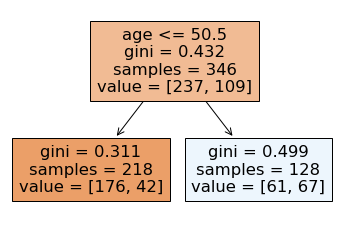

In [182]:
plot_tree(prunned_clf, feature_names=X.columns, filled=True)

## 4) Methods comparison

LR vs KNN, Decision Tree

In [224]:
#KNN
best_knn = KNeighborsClassifier(n_neighbors=61)
best_knn.fit(X_train, y_train)
#Decision Tree
prunned_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
prunned_clf.fit(X_train, y_train)
#LR
lr_clf = LogisticRegression(max_iter=100)
lr_clf.fit(X_train, y_train)

print('KNN : {:.2f}, Tree {:.2f}, LR {:.2f} '.format(best_knn.score(X_test,y_test), prunned_clf.score(X_test, y_test), lr_clf.score(X_test, y_test)))

KNN : 0.69, Tree 0.72, LR 0.77 


/Users/francoislegac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [215]:
df #(462, 9)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0
